<a href="https://colab.research.google.com/github/XuanBac2/Du-lieu-lon-va-ung-dung/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Bài Làm

In [47]:
# Khai báo thư viện
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

## Đọc và hiểu dữ liệu

In [9]:
# Đoc dữ liệu
df = pd.read_csv("Tetuan City power consumption.csv")
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


### Khái quát về dữ liệu:

#### - Tập dữ liệu bao gồm 52416 dòng và 9 cột:
1. **DateTime**: Dấu thời gian của từng lần đo.
2. **Temperature**: Nhiệt độ môi trường (°C).
3. **Humidity**: Độ ẩm không khí (%).
4. **Wind Speed**: Tốc độ gió (m/s).
5. **general diffuse flows**: Lưu lượng khuếch tán tổng thể của ánh sáng mặt trời.
6. **diffuse flows**: Lưu lượng khuếch tán riêng biệt của ánh sáng mặt trời.
7. **Zone 1 Power Consumption**: Mức tiêu thụ điện tại khu vực 1 (kWh).
8. **Zone 2 Power Consumption**: Mức tiêu thụ điện tại khu vực 2 (kWh).
9. **Zone 3 Power Consumption**: Mức tiêu thụ điện tại khu vực 3 (kWh).

#### - Tập dữ liệu này không có giá trị missing



In [52]:
#kiểm tra dữ liệu trùng lặp
df.duplicated().sum()

0

**Nhận xét**: Tập dữ liệu không có giá trị trùng lặp

In [53]:
# Quan sát đặc trưng thống
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


### Nhận xét tập dữ liệu:

 **1. Temperature (Nhiệt độ):**
- **Trung bình**: 18.81°C. **Phạm vi**: 3.25°C - 40.01°C.
- **Độ lệch chuẩn**: 5.82°C. Nhiệt độ ổn định, khí hậu mát mẻ.

 **2. Humidity (Độ ẩm):**
- **Trung bình**: 68.26%. **Phạm vi**: 11.34% - 94.8%.
- **Độ lệch chuẩn**: 15.55%. Độ ẩm dao động đáng kể.

 **3. Wind Speed (Tốc độ gió):**
- **Trung bình**: 1.96 m/s. **Phạm vi**: 0.05 m/s - 6.48 m/s.
- **Độ lệch chuẩn**: 2.35 m/s. Phần lớn tốc độ gió thấp.

 **4. General Diffuse Flows (Khuếch tán tổng thể):**
- **Trung bình**: 182.7. **Phạm vi**: 0.004 - 1163.
- **Độ lệch chuẩn**: 264.4. Giá trị bị lệch mạnh.

**5. Diffuse Flows (Khuếch tán riêng biệt):**
- **Trung bình**: 75.03. **Phạm vi**: 0.011 - 936.
- **Độ lệch chuẩn**: 124.21. Dao động lớn.

**6. Zone 1 Power Consumption:**
- **Trung bình**: 32,344.97 kWh. **Phạm vi**: 13,895.70 - 52,204.39 kWh.
- **Độ lệch chuẩn**: 7,130.56 kWh.

**7. Zone 2 Power Consumption:**
- **Trung bình**: 21,042.51 kWh. **Phạm vi**: 8,560.08 - 37,408.86 kWh.
- **Độ lệch chuẩn**: 5,201.47 kWh.

 **8. Zone 3 Power Consumption:**
- **Trung bình**: 17,835.41 kWh. **Phạm vi**: 5,935.17 - 47,598.33 kWh.
- **Độ lệch chuẩn**: 6,622.17 kWh.


---
## Chia tập dữ liệu Train-Test

In [11]:
# Tạo ra 1 bản sao mới
new_file = df.copy()
new_file.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [12]:
# Xóa những cột dữ liệu không liên quaquan
new_file = new_file.drop(columns=["Zone 1 Power Consumption", "Zone 2  Power Consumption"])
new_file.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,18442.40964


In [13]:
# Chuyển cột datetime thành dạng Date
new_file['DateTime'] = pd.to_datetime(new_file['DateTime'])

In [14]:
# Set Date as index
new_file.set_index('DateTime', inplace=True)

In [15]:
# Kiểm tra dữ liệu thiếu trong file
print("Missing values:\n", new_file.isnull().sum())

Missing values:
 Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 3  Power Consumption    0
dtype: int64


In [16]:
new_file.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,47598.326360


In [19]:
# Chọn các cột số để chuẩn hóa
columns_to_scale = ["Zone 3  Power Consumption"]

# Tạo một đối tượng scaler
scaler = MinMaxScaler()

# Chuẩn hóa các cột và thay thế vào dataframe
new_file[columns_to_scale] = scaler.fit_transform(new_file[columns_to_scale])

# Xem dữ liệu sau khi chuẩn hóa
new_file.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 3 Power Consumption
DateTime,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,0.343368
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,0.340731
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,0.329626
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,0.311165
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,0.300199


In [40]:
# Tách dữ liệu
from sklearn.model_selection import train_test_split

sequence_length = 144  # Chiều dài của một sequence
features =  ["Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows"]  # Cột đặc trưng đã chuẩn hóa
target = "Zone 3  Power Consumption"  # Cột mục tiêu

# Hàm tạo sequence
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data.iloc[i:i + sequence_length][features].values)
        y.append(data.iloc[i + sequence_length][target])
    return np.array(X), np.array(y)

In [41]:
# Chuẩn bị dữ liệu
X, y = create_sequences(new_file, sequence_length)

In [35]:
# Tách tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Xây dựng mô hình

In [42]:
# Xây dựng mô hình Simple RNN
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(sequence_length, len(features))),
    Dense(1)  # Dự đoán giá trị liên tục
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


* 	SimpleRNN(units=50): Lớp Simple RNN được sử dụng để xử lý dữ liệu chuỗi thời gian. Sử dụng 50 đơn vị trong lớp RNN để học các đặc trưng từ dữ liệu chuỗi. Hàm kích hoạt 'tanh' được sử dụng để đảm bảo các giá trị đầu ra nằm trong khoảng từ -1 đến 1, giúp giảm thiểu vấn đề vanishing gradient khi huấn luyện.

In [43]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [44]:
# Huấn luyện mô hình
from keras.callbacks import EarlyStopping

# Tạo callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Theo dõi giá trị hàm mất mát trên tập kiểm tra
    patience=5,          # Số epochs không cải thiện trước khi dừng huấn luyện
    restore_best_weights=True  # Khôi phục trọng số tốt nhất
)

# Huấn luyện mô hình với EarlyStopping
history = model.fit(
    X_train, y_train,
    epochs=70,                  # Số epochs tối đa
    batch_size=64,              # Kích thước batch
    validation_data=(X_test, y_test),  # Dữ liệu kiểm tra
    callbacks=[early_stopping], # Thêm EarlyStopping vào quá trình huấn luyện
    verbose=1
)

Epoch 1/70
655/655 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.1774 - mae: 0.2429 - val_loss: 0.0226 - val_mae: 0.1188
Epoch 2/70
655/655 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0212 - mae: 0.1141 - val_loss: 0.0199 - val_mae: 0.1094
Epoch 3/70
655/655 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0187 - mae: 0.1074 - val_loss: 0.0180 - val_mae: 0.1050
Epoch 4/70
655/655 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0174 - mae: 0.1041 - val_loss: 0.0167 - val_mae: 0.1026
Epoch 5/70
655/655 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0164 - mae: 0.1011 - val_loss: 0.0164 - val_mae: 0.1024
Epoch 6/70
655/655 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0157 - mae: 0.0993 - val_loss: 0.0150 - val_mae: 0.0983
Epoch 7/70
655/655 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0151 - mae: 0.0973 - val_loss: 0.0145 - val_mae: 0.0944
Epoch 8/70
655/655 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0141 - mae: 0.0936 - val_loss: 0.0143 - val_mae: 0.0948
Epoch 9/70
655/655 ━━━━━━━━━━━━━━━━━━━━ 6s 10m

In [56]:
# Dự đoán
y_pred = model.predict(X_test)

# Đảm bảo y_pred có định dạng phù hợp để chuyển đổi ngược
y_pred = y_pred.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Chuyển đổi giá trị dự đoán và thực tế về dạng ban đầu
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

# Tính toán các chỉ số đánh giá
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Tính RMSE
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))

# In các chỉ số đánh giá
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test_original, y_pred_original))
print("Mean Squared Error (MSE):", mean_squared_error(y_test_original, y_pred_original))
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2_score(y_test_original, y_pred_original))


328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Mean Absolute Error (MAE): 3605.733584682145
Mean Squared Error (MSE): 21960120.12244517
Root Mean Squared Error (RMSE): 4686.16262227904
R2 Score: 0.5087426825766392


### **Nhận xét**:
**Hiệu suất mô hình còn hạn chế:**

* MAE, RMSE và Loss đều khá cao, thể hiện rằng mô hình chưa dự đoán chính xác tiêu thụ năng lượng của Zone 3.
* R² trung bình cho thấy rằng mô hình chưa khai thác được nhiều thông tin từ dữ liệu để đưa ra dự đoán tốt.



In [55]:

# Chuyển đổi giá trị dự đoán và thực tế về dạng ban đầu
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Tạo DataFrame so sánh
comparison_df = pd.DataFrame({
    "Thực tế": y_test_original.flatten(),  # Chuyển mảng thành 1D
    "Dự đoán": y_pred_original.flatten()
})

# Hiển thị 100 giá trị đầu tiên
print(comparison_df.head(100))

        Thực tế       Dự đoán
0   15822.58065  14909.069336
1   31872.80335  29879.453125
2   13893.46734  15590.393555
3   20325.51724  23177.591797
4   29643.51464  20127.609375
..          ...           ...
95  13343.90194  26893.281250
96  22329.78056  16598.708984
97  17029.81818  15948.824219
98  14875.56923  16705.347656
99  15016.56663  15626.160156

[100 rows x 2 columns]


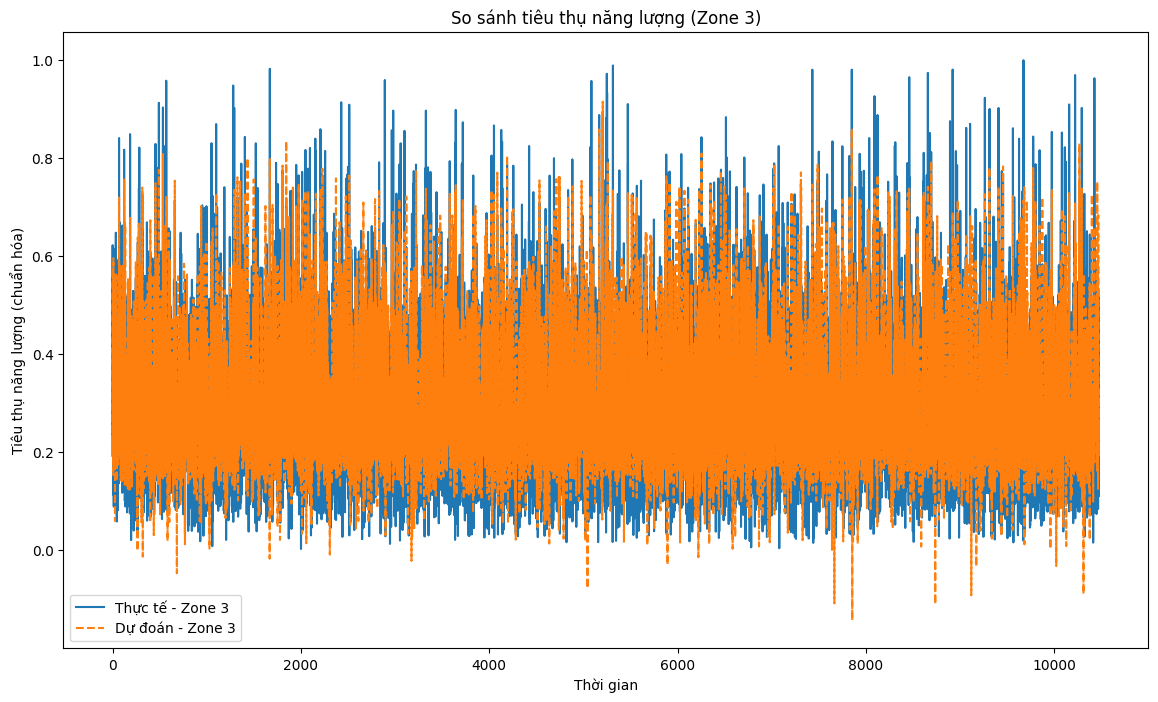

In [46]:
plt.figure(figsize=(14, 8))

# Zone 3
plt.plot(y_test, label='Thực tế - Zone 3')
plt.plot(y_pred, label='Dự đoán - Zone 3', linestyle='dashed')
plt.legend()
plt.title("So sánh tiêu thụ năng lượng (Zone 3)")
plt.xlabel("Thời gian")
plt.ylabel("Tiêu thụ năng lượng (chuẩn hóa)")
plt.show()


### **Nhận xét:**

**Sự khác biệt giữa đường thực tế và dự đoán:**

* Đường dự đoán (dashed line) gần sát với đường thực tế (solid line) ở nhiều đoạn, đặc biệt là tại các đỉnh cao (giá trị tiêu thụ lớn).
* Điều này cho thấy mô hình dự đoán với độ chính xác trung bình.
### **Kết luận:**
* Mô hình hiện tại chưa đủ tốt để dự đoán tiêu thụ năng lượng một cách chính xác.
* Qua các chỉ số đánh giá mô hình, có thể thấy mô hình RNN không phù hợp để dự đoán đối với bộ dữ liệu trên.



# Save model

In [48]:
model.save('RNN_model.h5')

In [49]:
from keras.models import load_model

new_model = load_model('RNN_model.h5', custom_objects={'mse': 'mean_squared_error'})

In [50]:
new_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,853 (11.15 KB)

 Trainable params: 2,851 (11.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)